# Evaluation of Cross Lingual
In this experiment, we replicated the language training-test procedure. We trained the model using one of the languages (English, Italian, or German) and tested it using Urdu, and vice versa. 

In [53]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [54]:
# data

# testing with urdu
train_english_test_urdu = pd.read_csv('train_english_test_urdu.csv')
train_german_test_urdu = pd.read_csv('train_german_test_urdu.csv')
train_italian_test_urdu = pd.read_csv('train_italian_test_urdu.csv')

# training with urdu
train_urdu_test_english = pd.read_csv('train_urdu_test_english.csv')
train_urdu_test_german = pd.read_csv('train_urdu_test_german.csv')
train_urdu_test_italian = pd.read_csv('train_urdu_test_italian.csv')
df_melted = train_english_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")

# baselines
baseline_english = pd.read_csv(r'..\Baseline\english_results.csv') 
baseline_german = pd.read_csv(r'..\Baseline\german_results.csv')
baseline_italian = pd.read_csv(r'..\Baseline\italian_results.csv')
baseline_urdu = pd.read_csv(r'..\Baseline\urdu_results.csv')


In [55]:
# data preparation
# Melt the DataFrame to long format for easier plotting
train_english_test_urdu = train_english_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_german_test_urdu = train_german_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_italian_test_urdu = train_italian_test_urdu.melt(id_vars="Model", var_name="Metric", value_name="Score")

train_urdu_test_english = train_urdu_test_english.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_german = train_urdu_test_german.melt(id_vars="Model", var_name="Metric", value_name="Score")
train_urdu_test_italian = train_urdu_test_italian.melt(id_vars="Model", var_name="Metric", value_name="Score")



In [56]:
# combine dataframes
dfs = [baseline_german, baseline_english, baseline_italian, baseline_urdu]
names = ['German', 'English', 'Italian', 'Urdu']
combined_df_baseline = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(dfs, names)],
        ignore_index=True
    )

# combine dataframes
df_test_urdu = [train_german_test_urdu, train_english_test_urdu, train_italian_test_urdu]
names = ['German', 'English', 'Italian']
combined_dfs_test_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_test_urdu, names)],
        ignore_index=True
    )

df_train_urdu = [train_urdu_test_english, train_urdu_test_german, train_urdu_test_italian]
names = ['English', 'German', 'Italian']
combined_dfs_train_urdu = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(df_train_urdu, names)],
        ignore_index=True
    )

In [57]:
# functions for plotting
def plot_results(df, title):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")
    plt.title(title)
    plt.xlabel("Score", fontsize = 12)
    plt.ylabel("Model", fontsize = 12)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_crosslingual_vs_baseline(df_baseline, df_comparison, datasets,titel):

    baseline_scores = [df_baseline[df_baseline['Dataset'] == ds]['Score'].values[0] for ds in datasets]
    comparison_scores = [df_comparison[df_comparison['Dataset'] == ds]['Score'].values[0] for ds in datasets]

    sns.set_style("whitegrid")
    x = np.arange(len(datasets))
    width = 0.35
    colors = sns.color_palette("viridis", 2)

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, comparison_scores, width, label='Cross Lingual', color=colors[0])
    rects2 = ax.bar(x + width/2, baseline_scores, width, label='Baseline', color=colors[1])

    ax.set_ylabel('Accuracy')
    ax.set_title(titel)
    ax.set_xticks(x)
    ax.set_xticklabels(datasets)
    ax.legend()
    plt.tight_layout()
    plt.show()    

# Crosslingual vs Baseline (Replicating Plots of the Paper)

In [58]:

# get baseline
df_baseline_accuracy = combined_df_baseline[(combined_df_baseline["Metric"] == "balanced_accuracy") & (combined_df_baseline["Model"] == "XGBoost")]
# training with urdu
datasets = ['German', 'English', 'Italian']
df_train_urdu_accuracy = combined_dfs_train_urdu[(combined_dfs_train_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_train_urdu["Model"] == "XGBoost")]

# testing with urdu
df_test_urdu_accuracy = combined_dfs_test_urdu[(combined_dfs_test_urdu["Metric"] == "Balanced Accuracy") & (combined_dfs_test_urdu["Model"] == "XGBoost")]


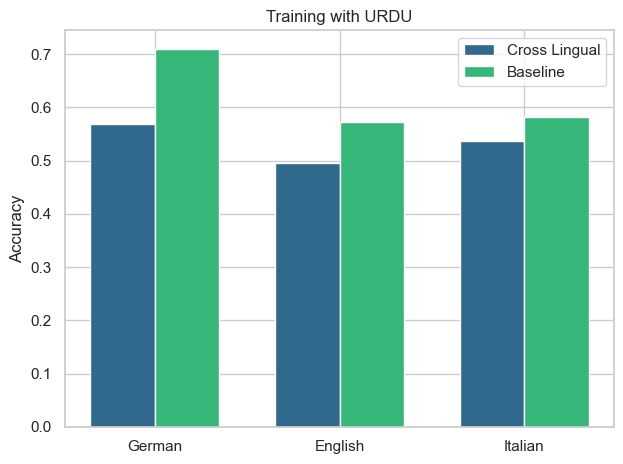

In [59]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_train_urdu_accuracy, datasets, "Training with URDU") 

In this plot, we see the results for the cross-lingual experiment using Urdu data for training and the other datasets for testing.
The balanced accuracy is shown on the y-axis.
We observe results very similar to those in the paper, with the cross-lingual results close to 50%. The baseline performs better across all three datasets.

In the paper, they also mentioned that the accuracy drops significantly compared to the baseline results.

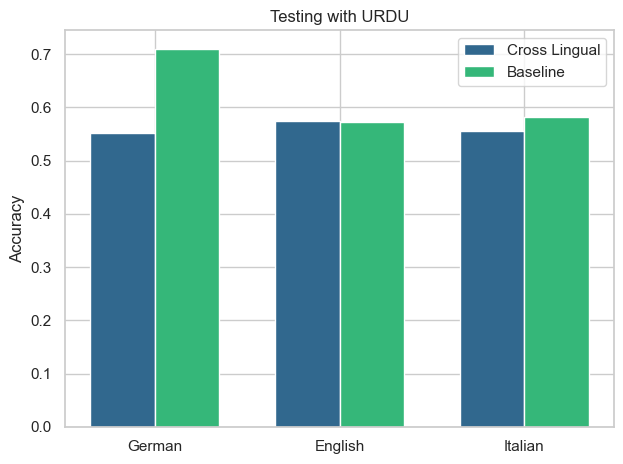

In [60]:
plot_crosslingual_vs_baseline(df_baseline_accuracy, df_test_urdu_accuracy, datasets, "Testing with URDU")

In this plot, we present the results of the cross-lingual experiment, using Urdu data for testing and the other datasets (English, Italian, or German) for training. The balanced accuracy is shown on the y-axis.
We observe results similar to those reported in the paper, with the cross-lingual results approaching 50%. Our Cross Lingual results  are slightly better as in the paper, which we attribute to the application of standardization. However, we are unable to explain why the baseline model performs worse for the English dataset as in the paper plot.

The paper suggests that these differences between the baseline and cross lingual experiemt may be due to varying studio conditions, labeling schemes, age groups, instruments used, and languages.

Through further exploration, we found that cross-lingual prediction does not perform better than a random dummy prediction, as we will demonstrate in the following plots.

### Testing with urdu

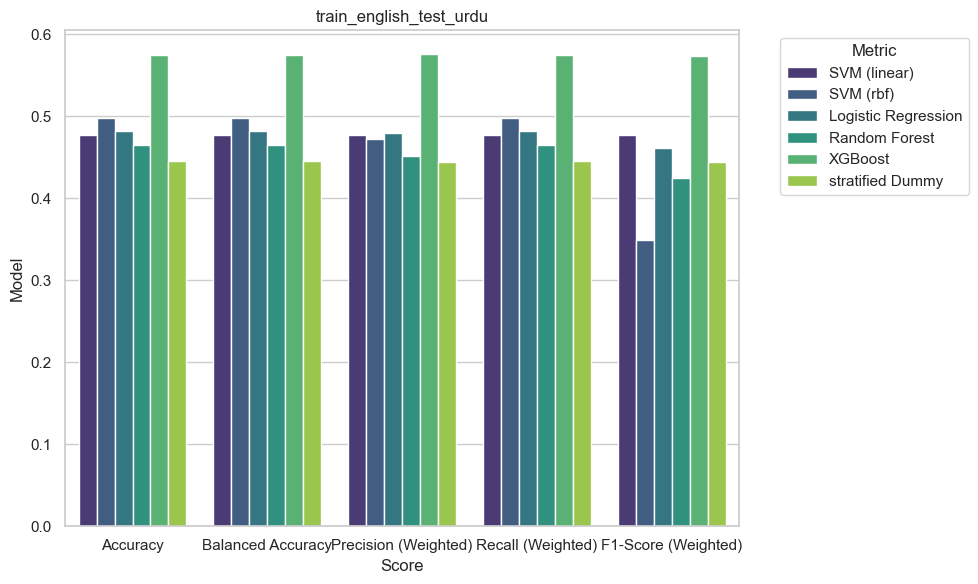

In [61]:
plot_results(train_english_test_urdu, "train_english_test_urdu")

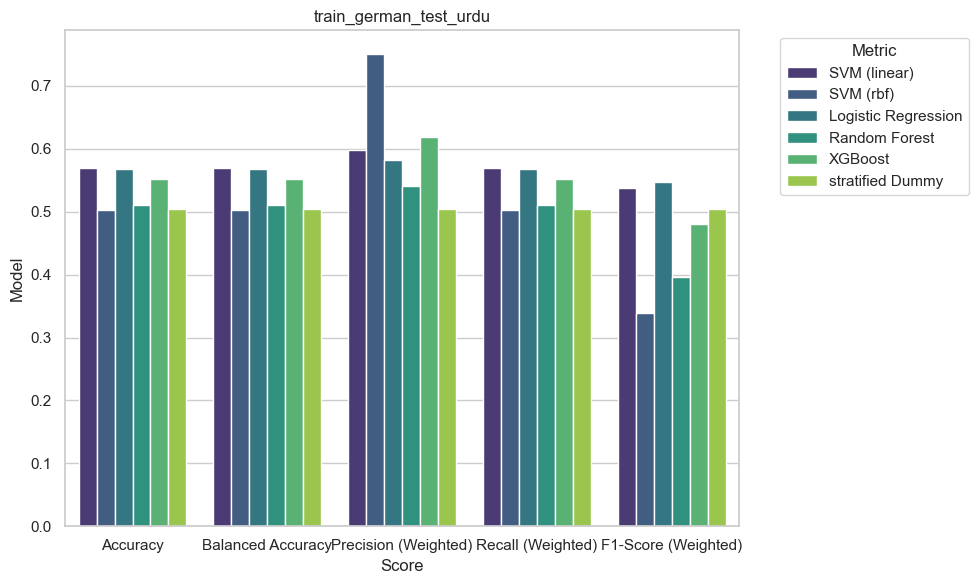

In [62]:
plot_results(train_german_test_urdu, "train_german_test_urdu")

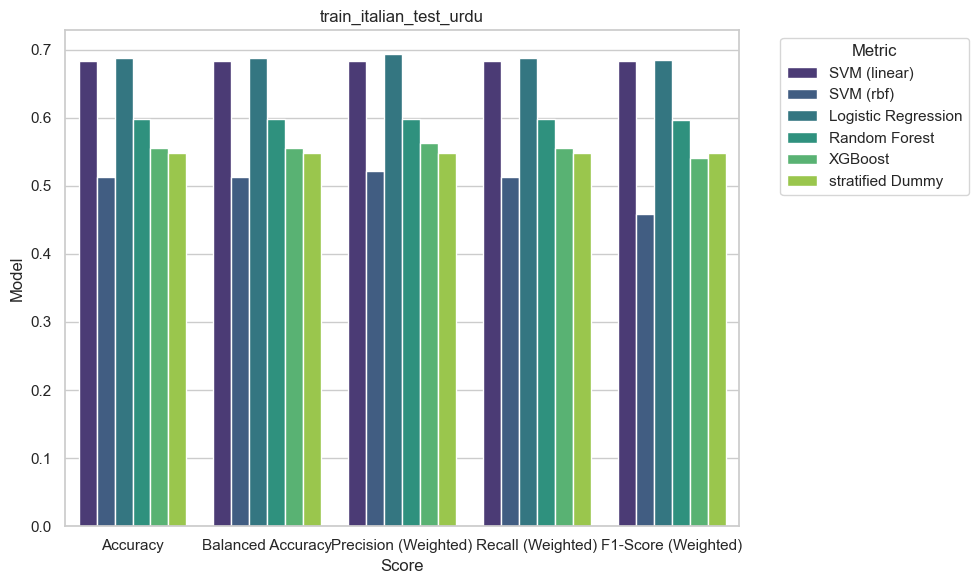

In [63]:
plot_results(train_italian_test_urdu, "train_italian_test_urdu")

Some of the models are slightly better than the dummy model.

## Training with Urdu

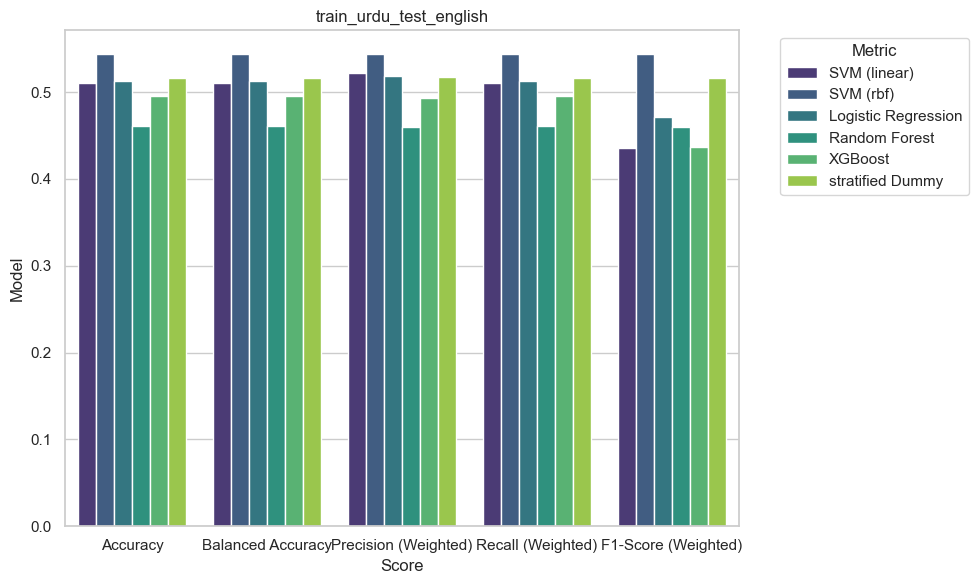

In [64]:
plot_results(train_urdu_test_english, "train_urdu_test_english")

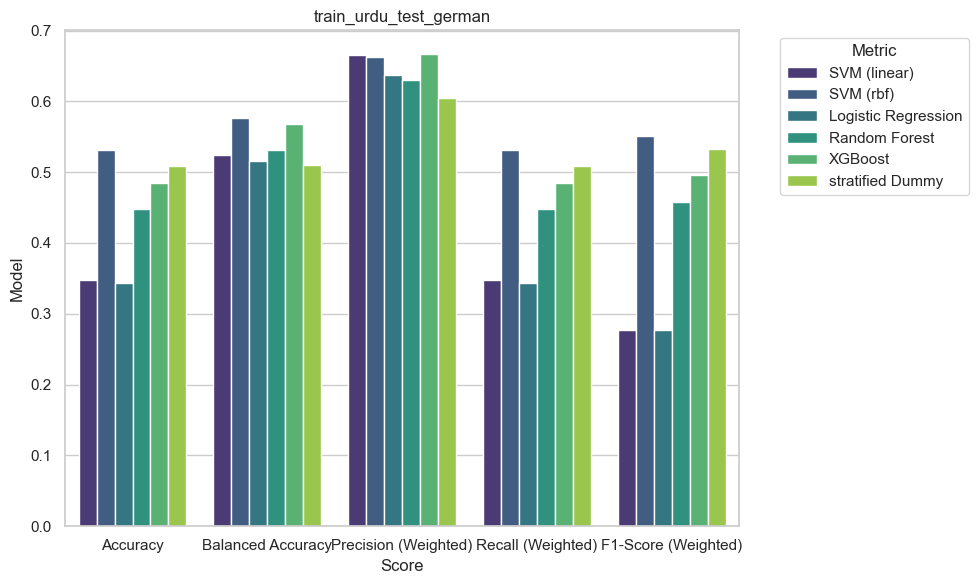

In [65]:
plot_results(train_urdu_test_german, "train_urdu_test_german")

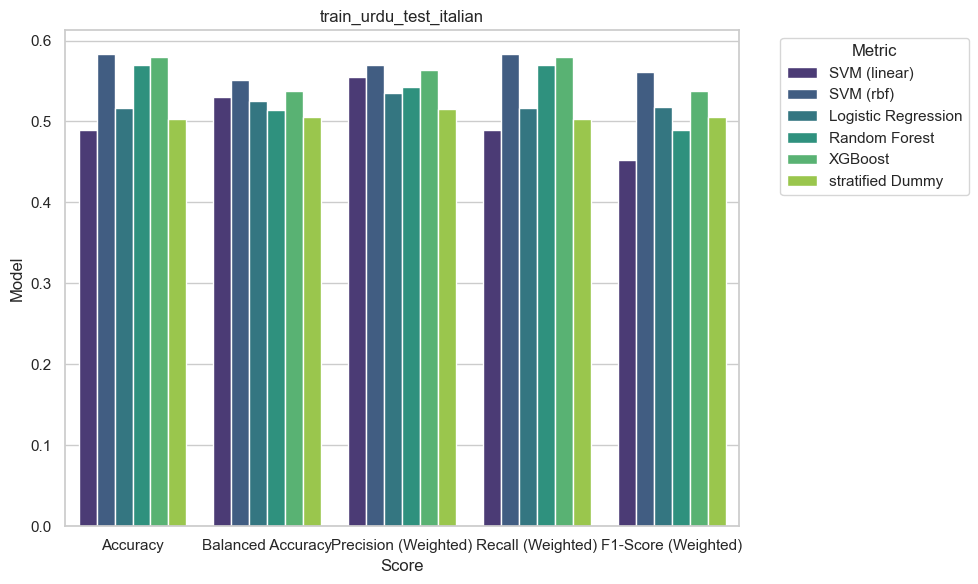

In [66]:
plot_results(train_urdu_test_italian, "train_urdu_test_italian")

We can see that when we train with Urdu and test with English, German, or Italian, the dummy model is not significantly worse in all four experiments. This suggests that cross-lingual prediction with these four datasets is not better than random.

# Conclusion 

We were able to replicate the results from the paper, but we found that the models did not perform better than a random dummy model. Based on this, we conclude that cross-lingual emotion detection does not work well for this small dataset.

To improve the results, it would be beneficial to conduct the experiment again with a larger dataset, ensuring that the conditions are consistent across all languages and that the same sentences are used. Additionally, one of the most important factors is to have more balanced datasets for all languages involved.